In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('./train.csv')

In [55]:
df.drop(['ID_code'], axis=1, inplace=True)

In [56]:
len(df.loc[df['target'] == 1]) / len(df)

0.10049

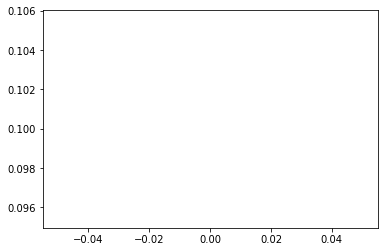

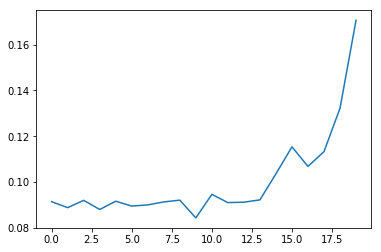

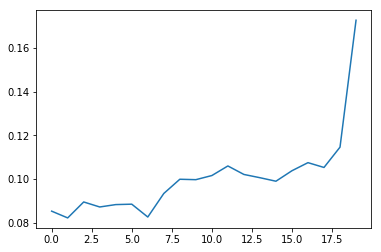

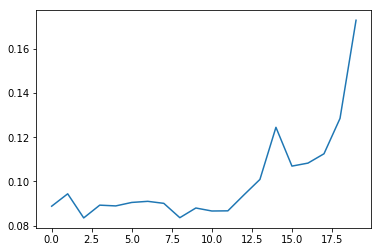

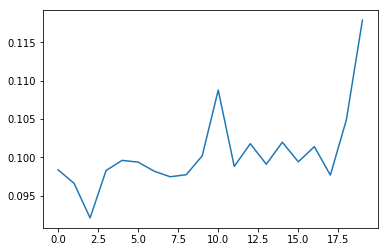

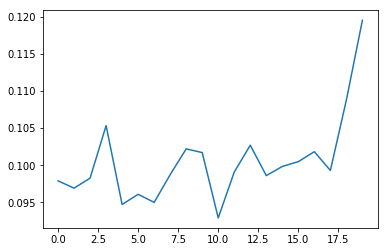

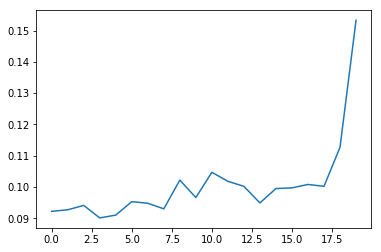

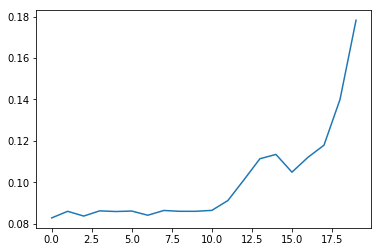

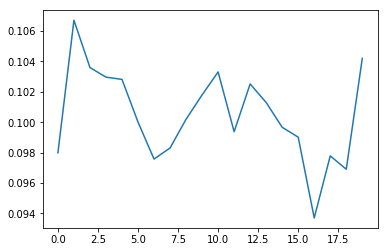

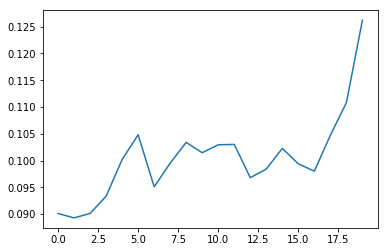

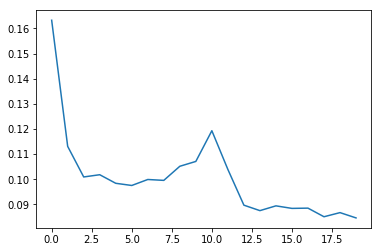

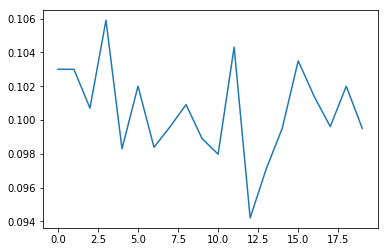

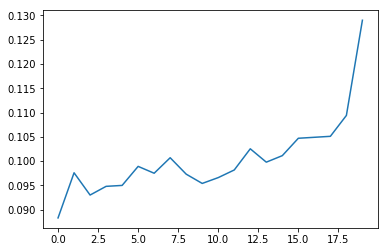

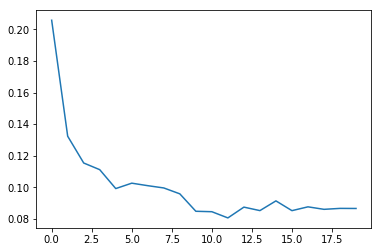

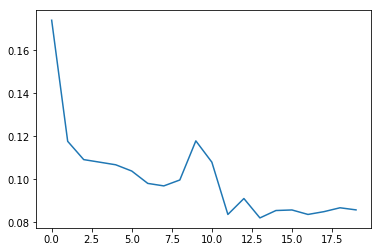

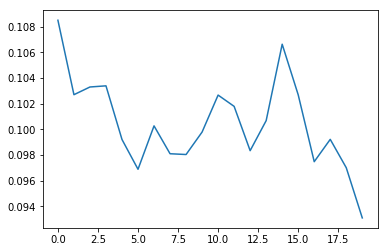

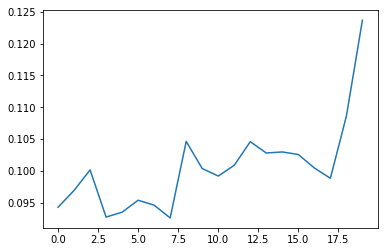

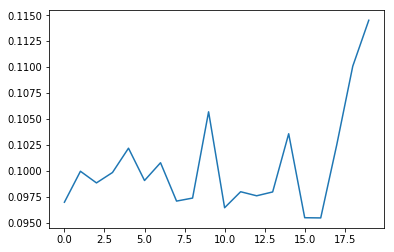

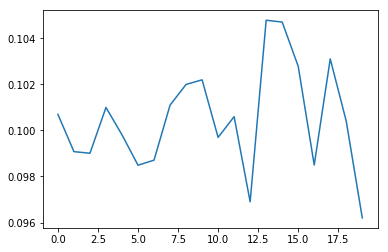

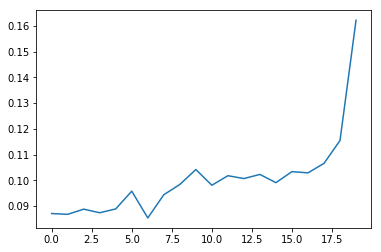

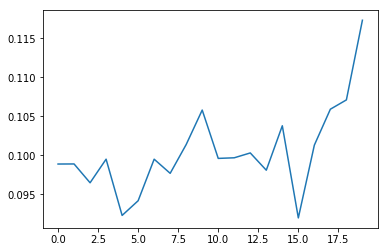

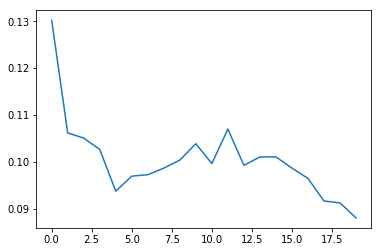

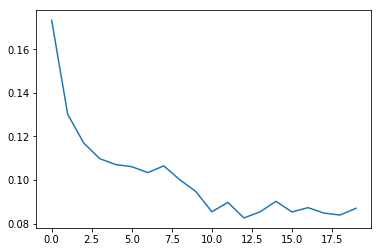

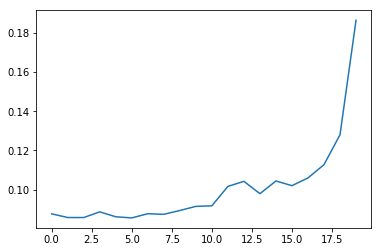

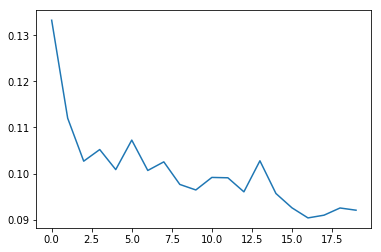

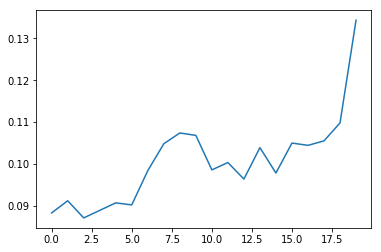

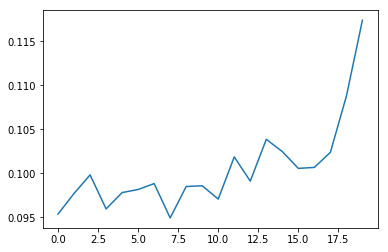

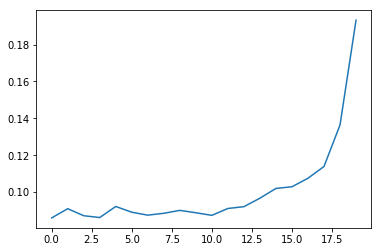

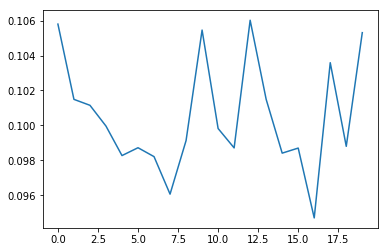

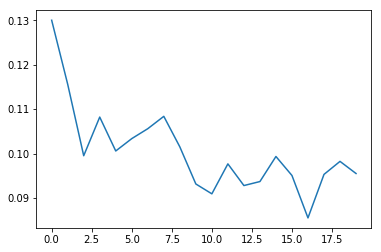

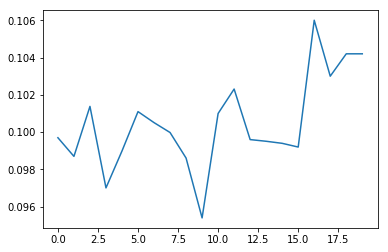

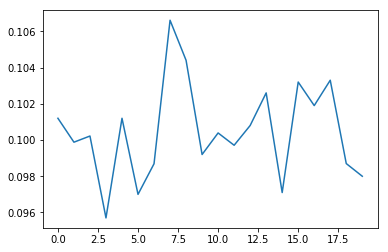

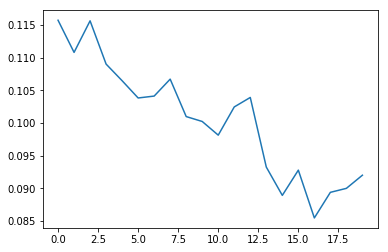

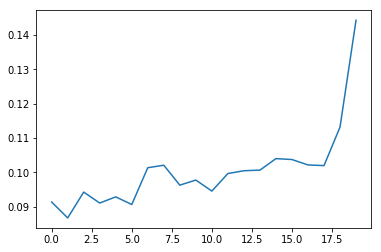

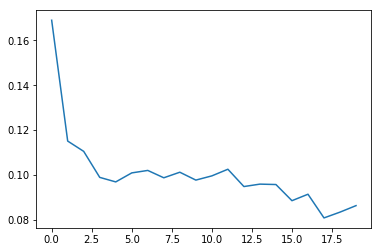

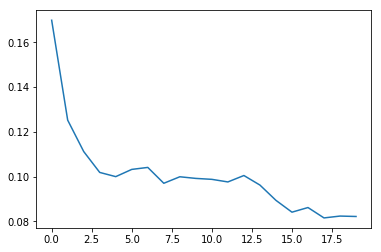

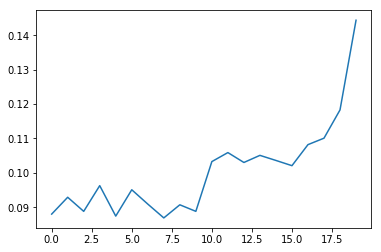

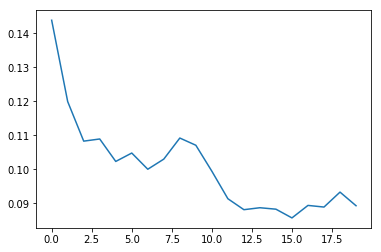

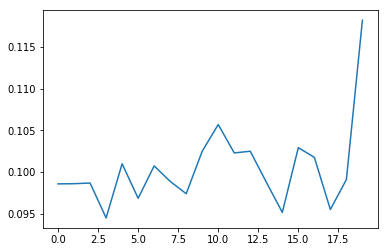

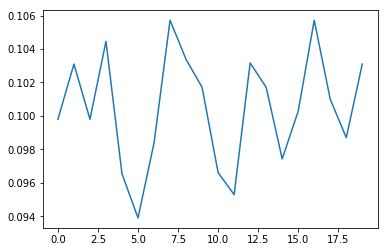

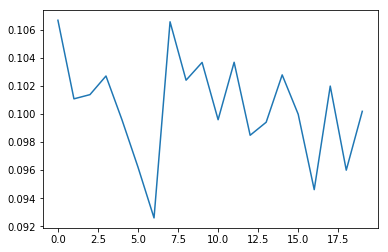

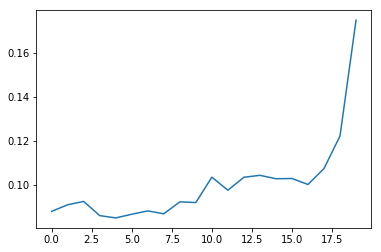

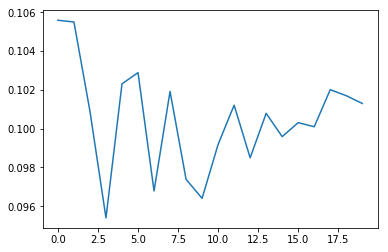

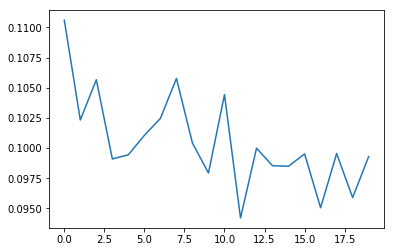

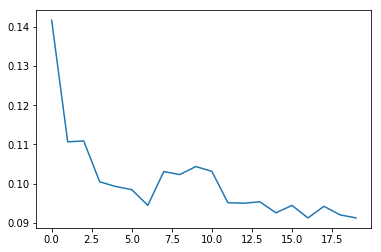

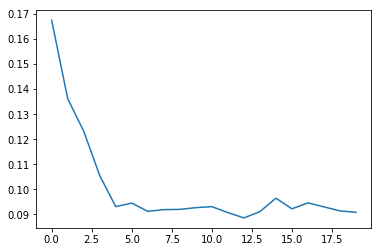

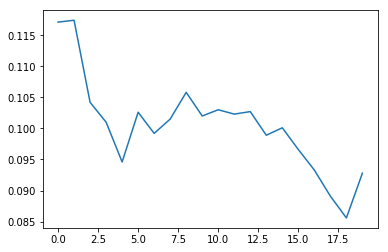

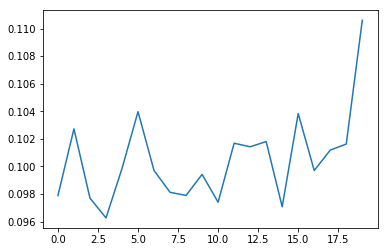

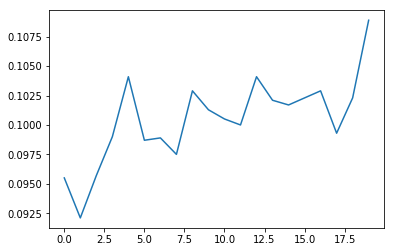

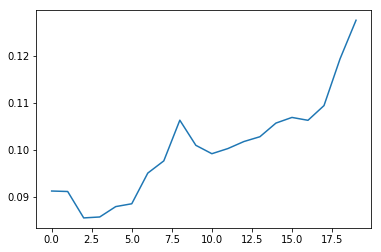

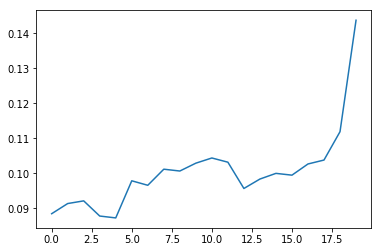

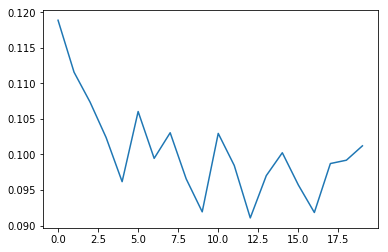

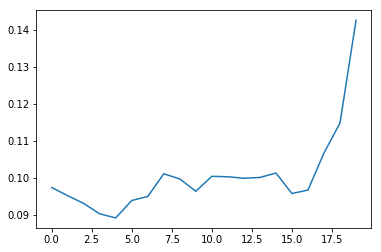

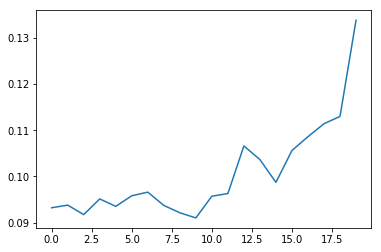

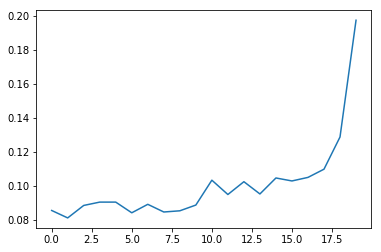

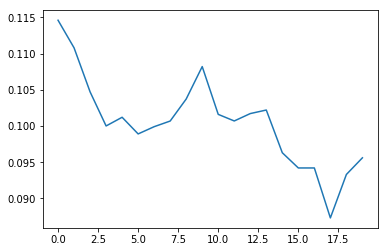

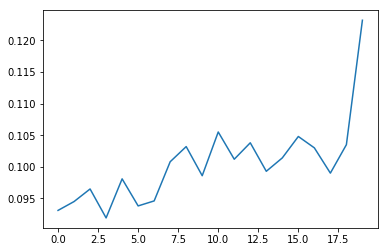

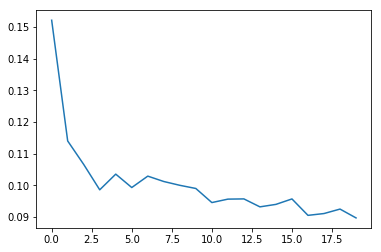

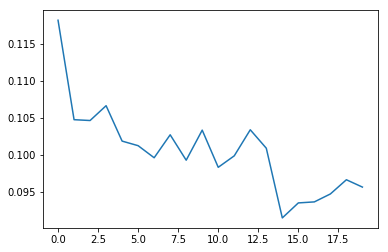

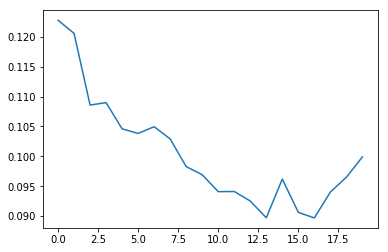

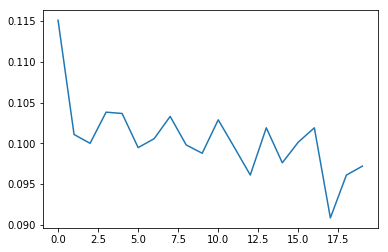

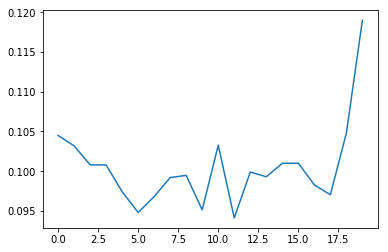

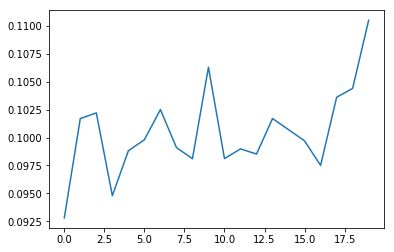

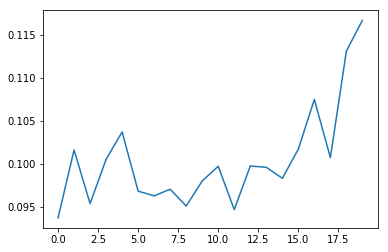

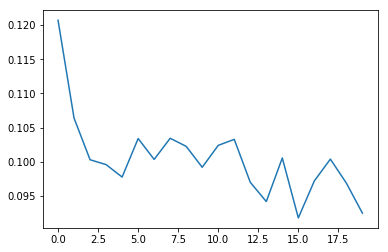

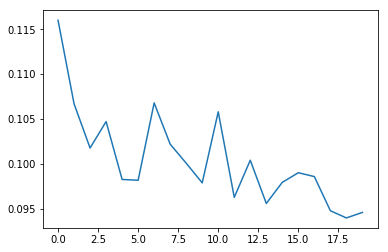

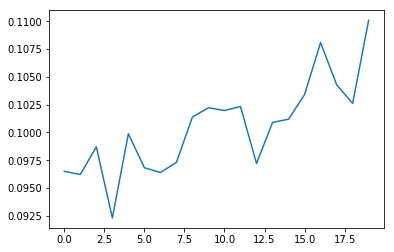

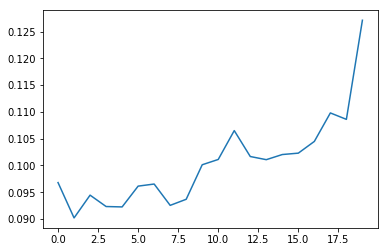

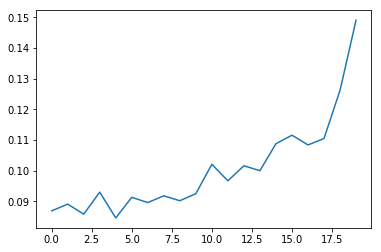

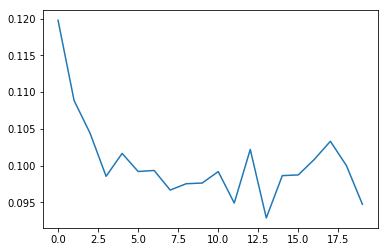

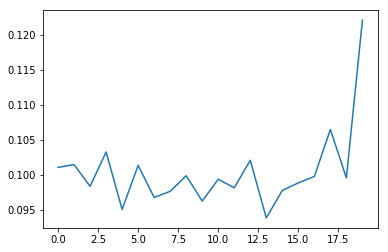

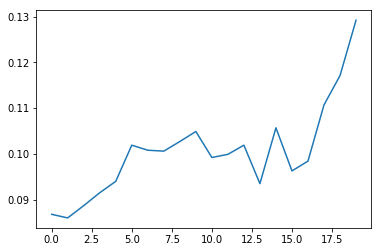

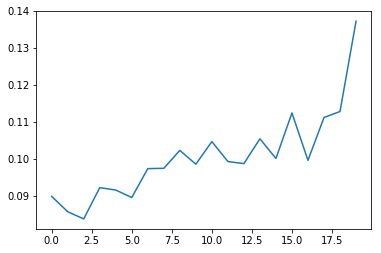

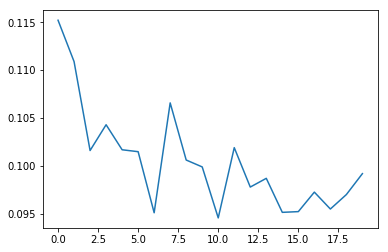

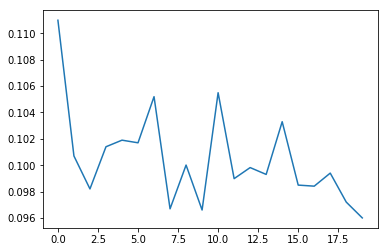

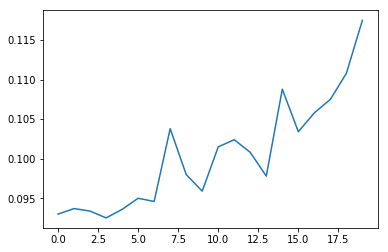

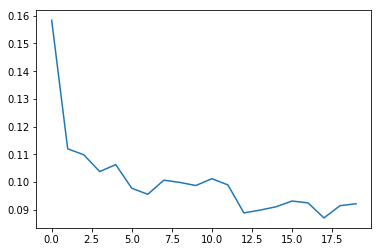

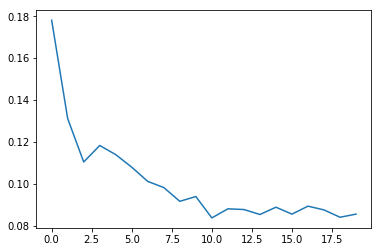

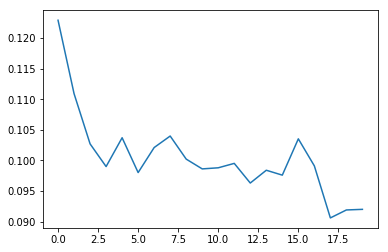

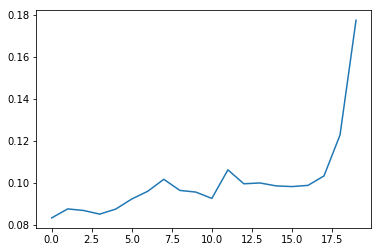

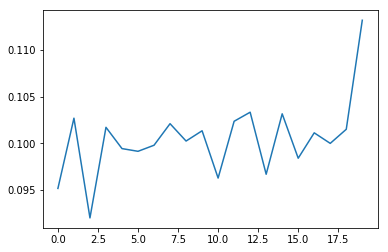

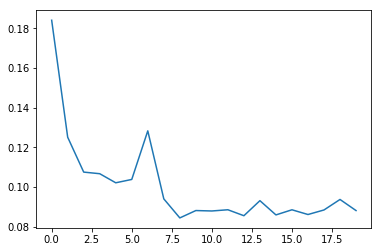

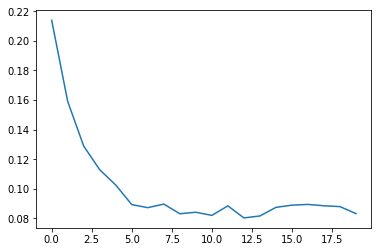

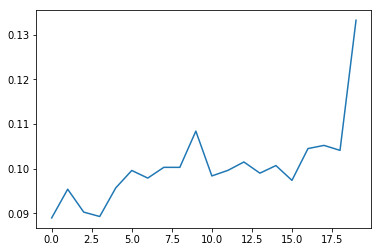

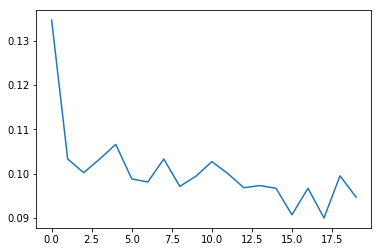

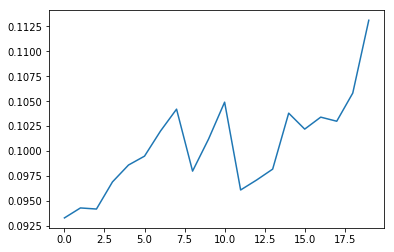

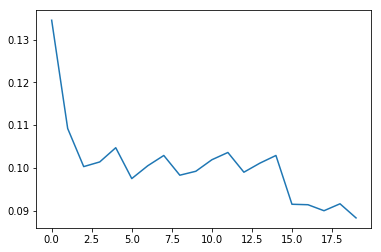

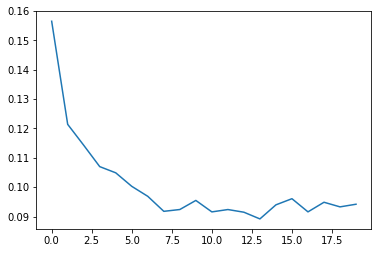

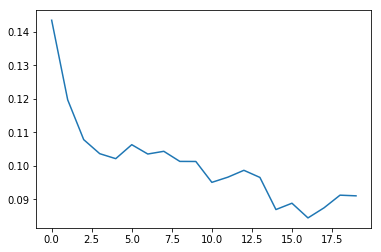

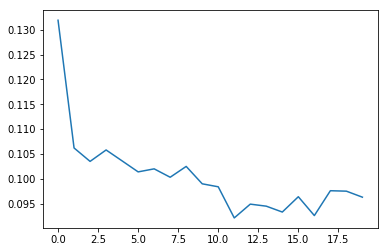

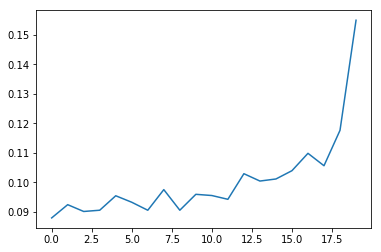

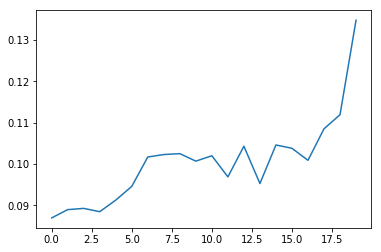

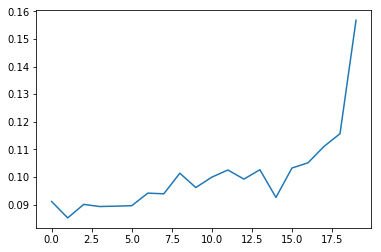

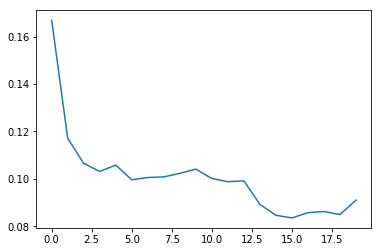

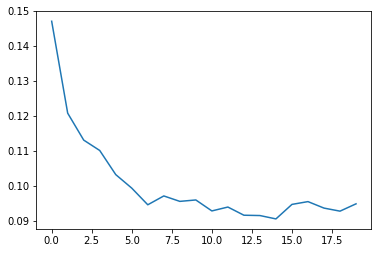

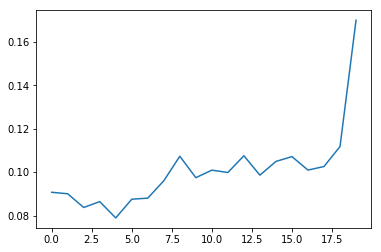

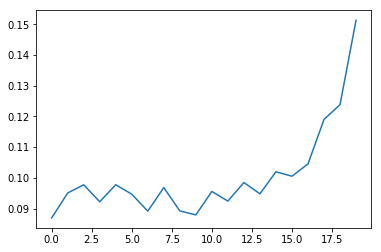

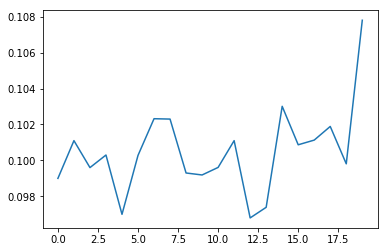

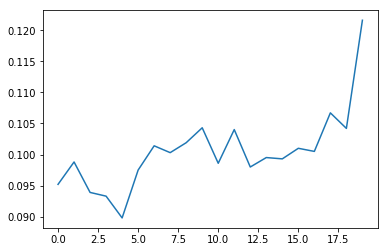

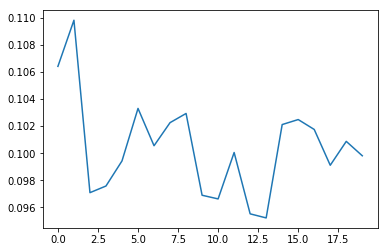

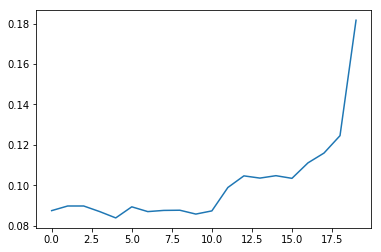

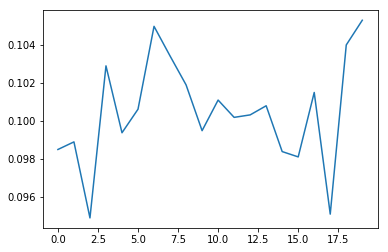

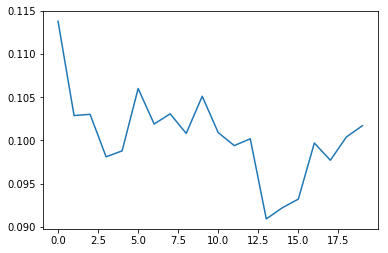

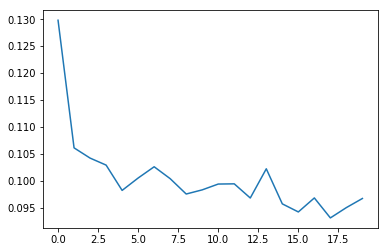

In [ ]:
for col in df.columns:
    df['gr'] = pd.qcut(df[col], 20, labels=False, duplicates='drop')
    plt.plot(sorted(df['gr'].unique()), df.groupby('gr').agg('mean')['target'])
    plt.show()

In [57]:
def GetGini(X, y):
    model = LogisticRegression()
    model.fit(X, y)
    return (2 * roc_auc_score(y, model.predict_proba(X)[:, 1]) - 1) * 100

def Binning(X):
    binn_dict = {}
    for col in X.columns:
        if col == 'target':
            continue
        X[col] = pd.qcut(X[col], 20, labels=sorted(list(set([X[col].quantile(x / 100) for x in range(0, 100, 5)]))), duplicates='drop')
        binn_dict[col] = sorted(list(set([X[col].quantile(x / 100) for x in range(0, 101, 5)])))
    return X, binn_dict
    
def lamerBinning(X):
    binn_dict = {}
    for col in X.columns:
        if col == 'target':
            continue
        binn = [X[col].quantile(x / 100) for x in range(0, 101, 5)]
        binn[0] = float('-inf')
        binn[-1] = float('inf')
                
        X[col] = np.digitize(X[col], binn)
        binn_dict[col] = binn
    return X, binn_dict
        
def WoE(X, y):    
    count_bad = np.sum(y)
    count_good = len(X) - count_bad
    X, binn_dict = lamerBinning(X)
    WoE_dict_for_all = {}
    X_y = pd.concat([X, y], axis=1)
    for col in X.columns:
        WoE_dict = {}                
        for g in X[col].unique():
            X_y_g = X_y.loc[X_y[col] == g]
            b_b = np.sum(X_y_g['target'])
            b_g = len(X_y_g) - np.sum(X_y_g['target'])
            if b_b == 0:
                b_b += 0.5
            if b_g == 0:
                b_g += 0.5            
            WoE_dict[g] = np.log(b_g / count_good) - np.log(b_b / count_bad)
        WoE_dict_for_all[col] = WoE_dict
        X[col] = X[col].apply(lambda x: WoE_dict[x])
    return X, WoE_dict_for_all, binn_dict

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.1)
X_train, woe_dict, binn_dict = WoE(X_train, y_train)

In [59]:
for col in X_test.columns:
    if col == 'target':
        continue    
    X_test[col] = np.digitize(X_test[col], binn_dict[col])
    X_test[col] = X_test[col].apply(lambda x: woe_dict[col][x])

In [50]:
gini_dict = {}
for col in X_train.columns:    
    gini_dict[col] = GetGini(X_train[[col]], y_train)

gini_dict = sorted(gini_dict.items(), key = lambda kv:kv[1])

print (gini_dict)

[('var_10', 1.4799265690994545), ('var_73', 1.5153372418392985), ('var_30', 1.5283479045278714), ('var_17', 1.7611755371816917), ('var_103', 1.8284218472278457), ('var_7', 1.8490494211885977), ('var_96', 1.8789352407935667), ('var_158', 1.972842859605839), ('var_124', 1.974052642606705), ('var_100', 2.0034017830339312), ('var_126', 2.02797325154902), ('var_185', 2.0382074657006033), ('var_46', 2.062583218078773), ('var_29', 2.086005673675273), ('var_117', 2.1435019094873997), ('var_38', 2.180219557930707), ('var_14', 2.2122964026845215), ('var_136', 2.2235882035562815), ('var_41', 2.22952050703209), ('var_59', 2.2644666558257365), ('var_98', 2.2835355979271554), ('var_27', 2.2944775642132154), ('var_65', 2.3262788489263775), ('var_61', 2.3306134364590836), ('var_160', 2.3509615074703616), ('var_129', 2.3591253494832376), ('var_47', 2.3788399429050866), ('var_39', 2.4176504380674535), ('var_143', 2.439070487416095), ('var_182', 2.494884431890787), ('var_189', 2.5742565173120013), ('var_

In [60]:
for col in X_train.columns:
    X_train['gr'] = pd.qcut(df[col], 20, labels=False, duplicates='drop')
    plt.plot(sorted(df['gr'].unique()), df.groupby('gr').agg('mean')['target'])
    plt.show()
X_train.drop('gr', axis=1)

KeyError: 'gr'

In [ ]:
log = LogisticRegression(verbose = 1)
log.fit(X_train, y_train)
roc_auc_score(y_test, log.predict_proba(X_test)[:, 1])

In [62]:
sum(y_test) / len(y_test), sum(y_train) / len(y_train)

(0.1002, 0.10052222222222222)

In [52]:
log.predict(X_test).sum() / len(X_test)

0.05262

In [29]:
test = pd.read_csv('./test.csv')

In [30]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [31]:
for col in test.columns:
    if col == 'ID_code':
        continue
    test[col] = np.digitize(test[col], binn_dict[col])
    test[col] = test[col].apply(lambda x: woe_dict[col][x])
    
pred = log.predict(test.drop('ID_code', axis=1))

In [33]:
df_pred = pd.concat([test, pd.Series(pred, name='target')], axis=1)
df_pred[['ID_code', 'target']].to_csv('sub.csv', index=False)